In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('50_Startups.csv')

In [74]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [75]:
X = df.iloc[:,:4]
Y = df.iloc[:,4].values

In [76]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
state = onehotencoder.fit_transform(df[['State']])

In [77]:
X = pd.concat([X,state],axis=1)

In [78]:
X = X.drop('State',axis=1)

In [79]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


In [80]:
X = X.drop('State_California',axis=1)

In [81]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
2,153441.51,101145.55,407934.54,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,1.0
4,142107.34,91391.77,366168.42,1.0,0.0


In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [89]:
y_pred = lr.predict(x_test)

In [90]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [93]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

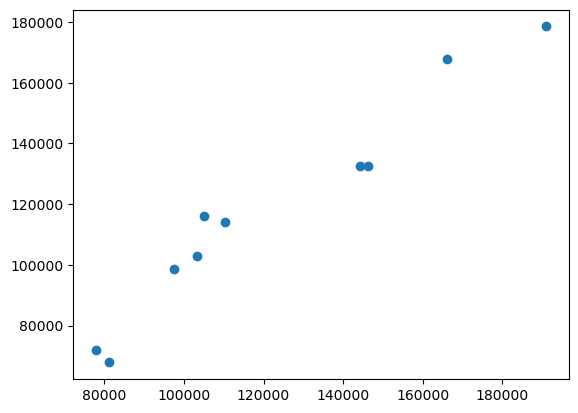

In [94]:
plt.scatter(y_test,y_pred)